#### Importação de bibliotecas

In [25]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import calendar
%matplotlib inline

### Carga dos dados

In [7]:
movimento_df = pd.read_csv('./staging/porto_ts.csv')

### Agrupando dados mensais

In [8]:
# Selecionar os registros com valor específico no campo 'campo_alvo'
jan = movimento_df.loc[movimento_df['mes'] == 1]
jan = jan.reset_index(drop=True)
jan.drop(['mes'], axis=1, inplace=True)

fev = movimento_df.loc[movimento_df['mes'] == 2]
fev = fev.reset_index(drop=True)
fev.drop(['mes'], axis=1, inplace=True)

mar = movimento_df.loc[movimento_df['mes'] == 3]
mar = mar.reset_index(drop=True)
mar.drop(['mes'], axis=1, inplace=True)

abr = movimento_df.loc[movimento_df['mes'] == 4]
abr = abr.reset_index(drop=True)
abr.drop(['mes'], axis=1, inplace=True)

mai = movimento_df.loc[movimento_df['mes'] == 5]
mai = mai.reset_index(drop=True)
mai.drop(['mes'], axis=1, inplace=True)

jun = movimento_df.loc[movimento_df['mes'] == 6]
jun = jun.reset_index(drop=True)
jun.drop(['mes'], axis=1, inplace=True)

jul = movimento_df.loc[movimento_df['mes'] == 7]
jul = jul.reset_index(drop=True)
jul.drop(['mes'], axis=1, inplace=True)

ago = movimento_df.loc[movimento_df['mes'] == 8]
ago = ago.reset_index(drop=True)
ago.drop(['mes'], axis=1, inplace=True)

sep = movimento_df.loc[movimento_df['mes'] == 9]
sep = sep.reset_index(drop=True)
sep.drop(['mes'], axis=1, inplace=True)

out = movimento_df.loc[movimento_df['mes'] == 10]
out = out.reset_index(drop=True)
out.drop(['mes'], axis=1, inplace=True)

nov = movimento_df.loc[movimento_df['mes'] == 11]
nov = nov.reset_index(drop=True)
nov.drop(['mes'], axis=1, inplace=True)

dez = movimento_df.loc[movimento_df['mes'] == 12]
dez = dez.reset_index(drop=True)
dez.drop(['mes'], axis=1, inplace=True)

### Correlações e Coeficientes angular e linear das séries mensais

In [9]:
# Correlação de janeiro
jan.corr()
X = jan[['ano']]  # Variável independente
y = jan['porto']    # Variável dependente

# Regressão linear de janeiro
modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
beta_jan = modelo.coef_
alfa_jan = modelo.intercept_

# Fevereiro
fev.corr()
X = fev[['ano']]
y = fev['porto']
modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
beta_fev = modelo.coef_
alfa_fev = modelo.intercept_

mar.corr()
X = mar[['ano']]
y = mar['porto']

modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
beta_mar = modelo.coef_
alfa_mar = modelo.intercept_

abr.corr()
X = abr[['ano']]
y = abr['porto']

modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
beta_abr = modelo.coef_
alfa_abr = modelo.intercept_

mai.corr()
X = mai[['ano']]
y = mai['porto']

modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
beta_mai = modelo.coef_
alfa_mai = modelo.intercept_

jun.corr()
X = jun[['ano']]
y = jun['porto']

modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
beta_jun = modelo.coef_
alfa_jun = modelo.intercept_

jul.corr()
X = jul[['ano']]
y = jul['porto']

modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
beta_jul = modelo.coef_
alfa_jul = modelo.intercept_

ago.corr()
X = ago[['ano']]
y = ago['porto']

modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
beta_ago = modelo.coef_
alfa_ago = modelo.intercept_

sep.corr()
X = sep[['ano']]
y = sep['porto']

modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
beta_sep = modelo.coef_
alfa_sep = modelo.intercept_

out.corr()
X = out[['ano']]
y = out['porto']

modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
beta_out = modelo.coef_
alfa_out = modelo.intercept_

nov.corr()
X = nov[['ano']]
y = nov['porto']

modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
beta_nov = modelo.coef_
alfa_nov = modelo.intercept_

dez.corr()
X = dez[['ano']]
y = dez['porto']

modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
beta_dez = modelo.coef_
alfa_dez = modelo.intercept_

### Comparação de dispersão Completa x Mensal

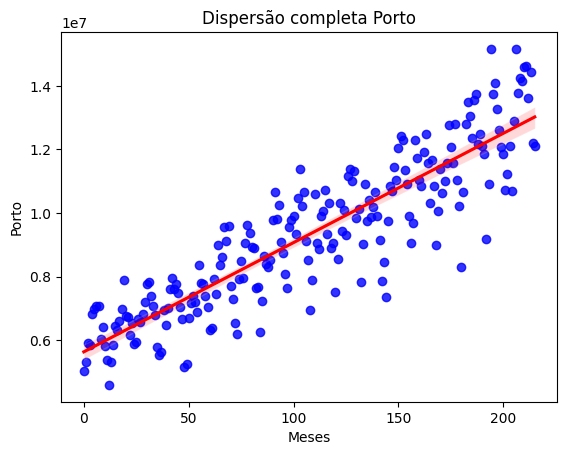

In [10]:
sns.regplot(data=movimento_df, x=movimento_df.index, y='porto', color='blue', line_kws={'color': 'red'})

# Configurar os títulos dos eixos
plt.xlabel('Meses')
plt.ylabel('Porto')

# Configurar o título do gráfico
plt.title('Dispersão completa Porto')
sns.set_style('whitegrid')
# Exibir o gráfico
plt.show()

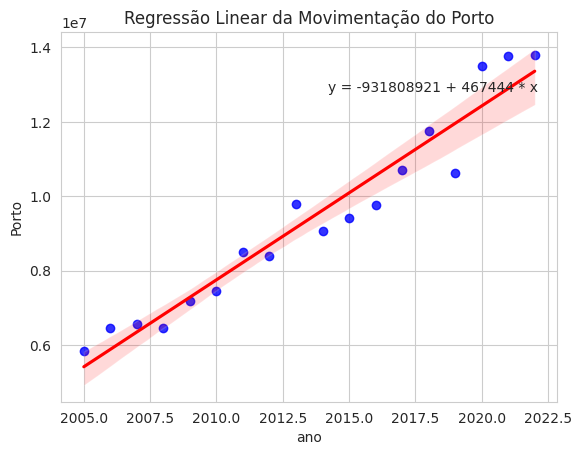

In [11]:
sns.regplot(data=abr, x=abr['ano'], y='porto', color='blue', line_kws={'color': 'red'})

plt.xlabel('ano')
plt.ylabel('Porto')
plt.title('Regressão Linear da Movimentação do Porto')

# Adicionar a equação da reta ao gráfico
equacao_reta= f'y = {str(int(round(alfa_abr, 0)))} + {str(int(round(beta_abr[0], 0)))} * x'
plt.text(0.75, 0.85, equacao_reta, ha='center', va='center', transform=plt.gca().transAxes)

plt.show()

#### Sazonalidade verificada no mês
Redução da influência da sazonalidad está muito mais atenuada

##### Individual

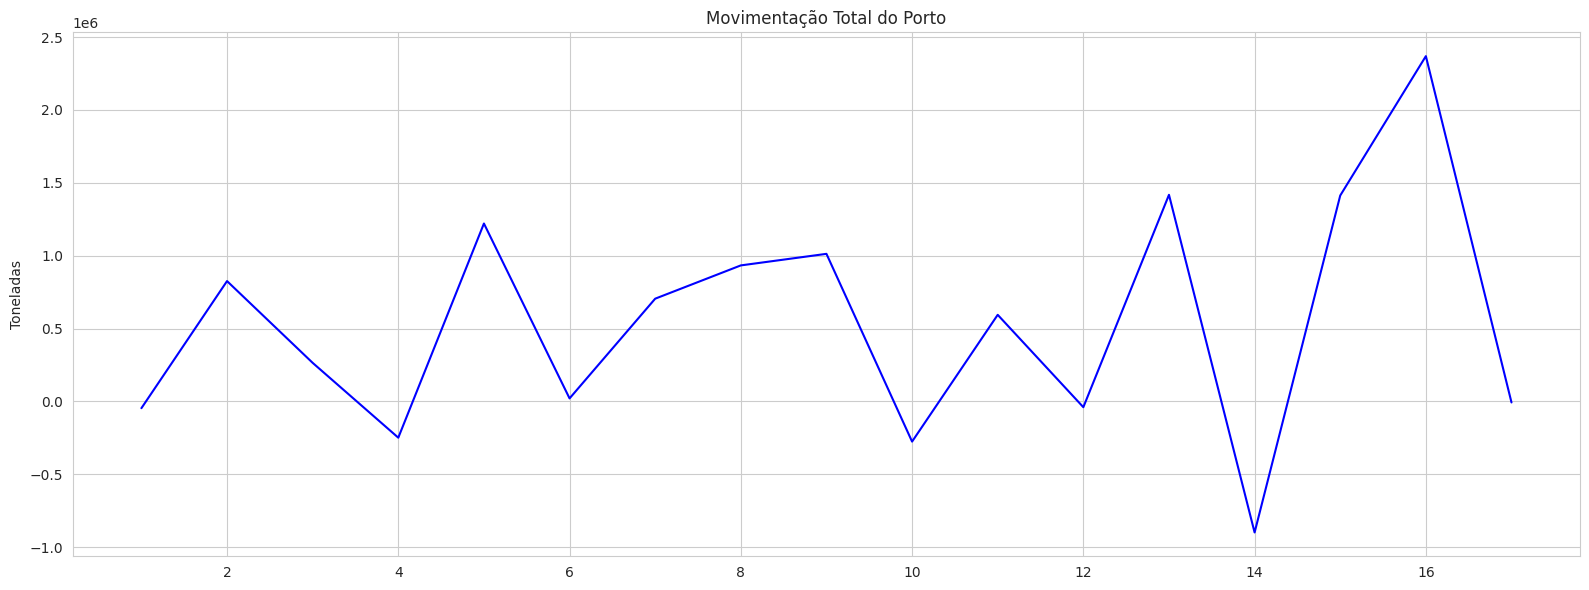

In [12]:
# Plotar cada variável em relação ao índice (data)
fig, axs = plt.subplots(figsize=(16, 6))

# Movimentação Total do Porto
axs.plot(mar.porto.diff(1), color='blue')
axs.set_ylabel('Toneladas')
axs.set_title('Movimentação Total do Porto')

plt.tight_layout()
plt.show()

### Movimentação mensal específica

<Figure size 1600x900 with 0 Axes>

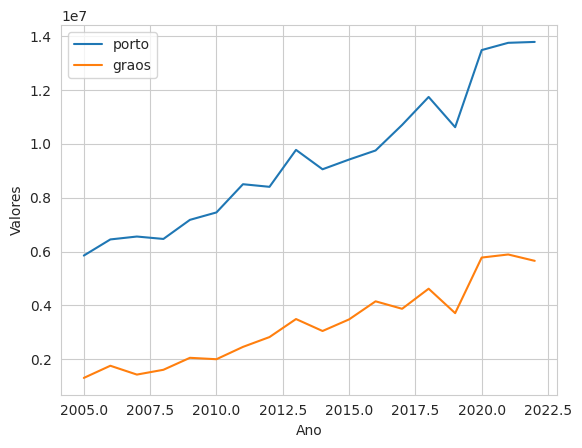

In [13]:
#abr[['porto', 'graos', 'outras', 'sugar']].plot()
# Plotar o gráfico de linhas
plt.figure(figsize=(16, 9))  # Define o tamanho da figura
abr[['ano', 'porto', 'graos']].plot(x='ano')

# Configurar os rótulos dos eixos
plt.xlabel('Ano')
plt.ylabel('Valores')

# Exibir o gráfico
plt.show()

### Exibindo Abril como exemplo

In [14]:
print(f'Abril:\nCoeficiente angular:{beta_abr[0]:>14.2f}\nCoeficiente linear: {alfa_abr:>14.2f}')

Abril:
Coeficiente angular:     467443.71
Coeficiente linear:  -931808921.07


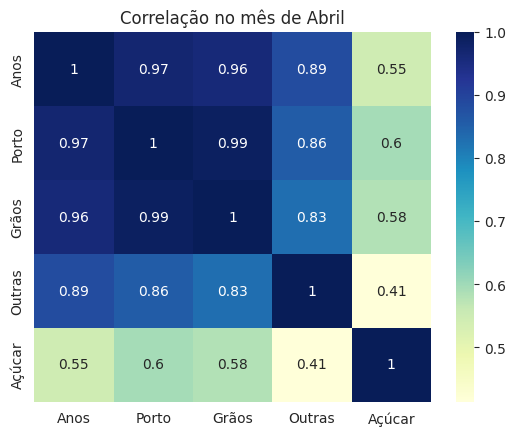

In [15]:
nomes_variaveis = ['Anos', 'Porto', 'Grãos', 'Outras', 'Açúcar']
ax = sns.heatmap(abr.corr(), cmap='YlGnBu', annot=True)
ax.set_xticklabels(nomes_variaveis, rotation=0)
ax.set_yticklabels(nomes_variaveis, rotation=90)
ax.set_title('Correlação no mês de Abril')
plt.show()

# Calculando as Predições

##### Criando período no dataframe final

In [16]:
# Criar uma lista de ano abaixo
inicio = 2023
periodo = 1
ano = list(range(inicio, inicio+periodo))

# Criar uma lista de meses de 1 a 12
mes = list(range(1, 13))

# Criar uma lista de DataFrames vazios
dfs = []

# Iterar sobre os anos e meses e adicionar as combinações aos DataFrames
for a in ano:
    for m in mes:
        dfs.append(pd.DataFrame({'ano': [a], 'mes': [m]}))

# Concatenar os DataFrames em um único DataFrame
df_final = pd.concat(dfs, ignore_index=True)


#### Função para cálculo dos valores peditivos conforme mês e ano

In [17]:
# Definir a função para calcular o valor de "porto" com base no valor de "mes"
def predicao_porto(df):
    if df['mes'] == 1:
        return (df['ano'] * beta_jan + alfa_jan).round(0)
    elif df['mes'] == 2:
        return (df['ano'] * beta_fev + alfa_fev).round(0)
    elif df['mes'] == 3:
        return (df['ano'] * beta_mar + alfa_mar).round(0)
    elif df['mes'] == 4:
        return (df['ano'] * beta_abr + alfa_abr).round(0)
    elif df['mes'] == 5:
        return (df['ano'] * beta_mai + alfa_mai).round(0)
    elif df['mes'] == 6:
        return (df['ano'] * beta_jun + alfa_jun).round(0)
    elif df['mes'] == 7:
        return (df['ano'] * beta_jul + alfa_jul).round(0)
    elif df['mes'] == 8:
        return (df['ano'] * beta_ago + alfa_ago).round(0)
    elif df['mes'] == 9:
        return (df['ano'] * beta_sep + alfa_sep).round(0)
    elif df['mes'] == 10:
        return (df['ano'] * beta_out + alfa_out).round(0)
    elif df['mes'] == 11:
        return (df['ano'] * beta_nov + alfa_nov).round(0)
    elif df['mes'] == 12:
        return (df['ano'] * beta_dez + alfa_dez).round(0)
    else:
        return None

# Aplicar a função para calcular a coluna "porto"
df1 = df_final.apply(predicao_porto, axis=1)

In [18]:
df1 = df1.astype(int).tolist()
df_final['porto'] = df1.copy()
del df1

### Valores Previstos

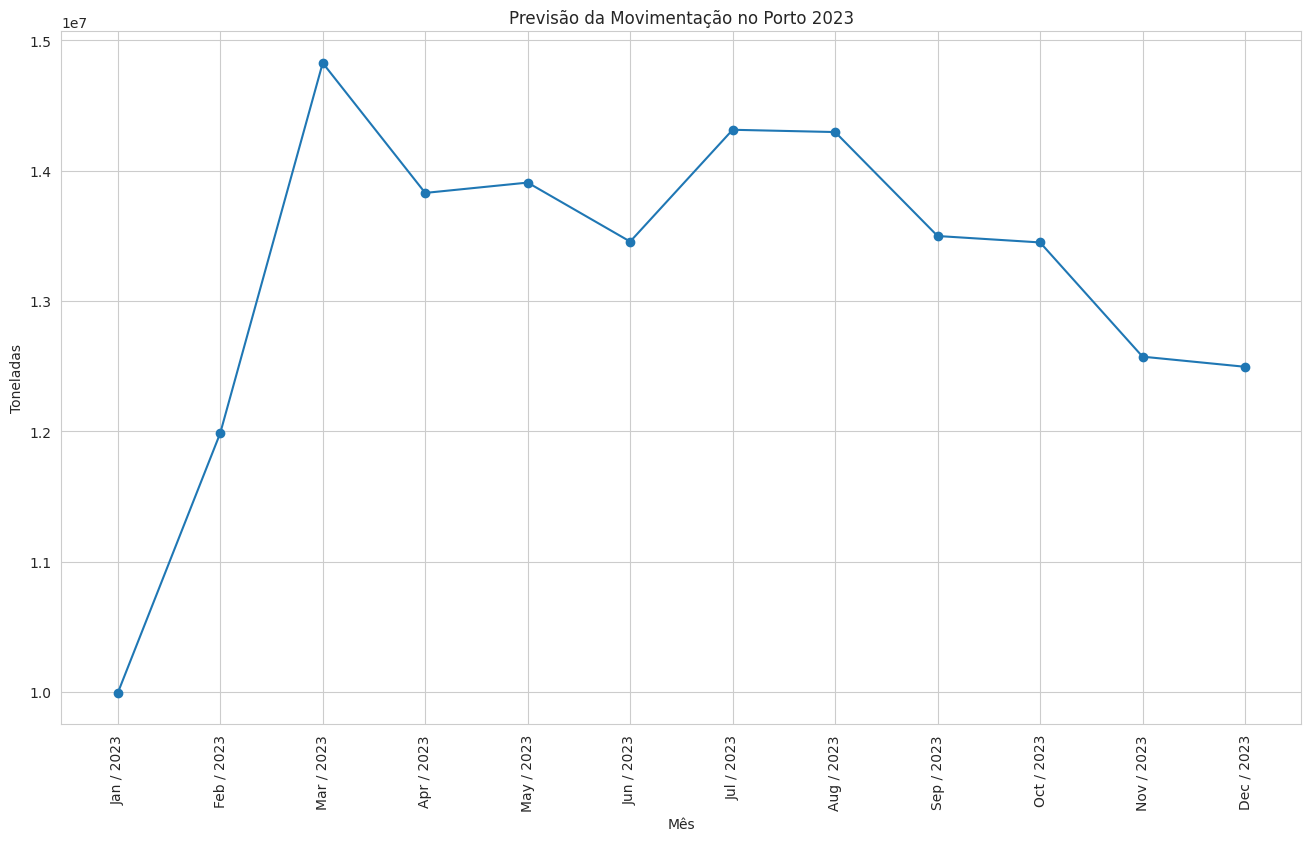

In [19]:
# Definir o estilo do seaborn
sns.set_style('whitegrid')

# Criar o gráfico em linha
plt.figure(figsize=(16, 9))  # Define o tamanho da figura
plt.plot(df_final['porto'], marker='o', linestyle='-')

# Configurar os rótulos do eixo x e o título do gráfico
meses_anos = [f"{calendar.month_abbr[mes]} / {ano}" for mes, ano in zip(df_final['mes'], df_final['ano'])]
plt.xticks(range(len(meses_anos)), meses_anos, rotation='vertical')
plt.xlabel('Mês')
plt.ylabel('Toneladas')
plt.title(f'Previsão da Movimentação no Porto 2023')

plt.show()

##### Formatação

In [20]:
df_final['data'] = pd.to_datetime(df_final['ano'].astype(str) + '-' + df_final['mes'].astype(str), format='%Y-%m')
porto_ts = df_final.drop(['ano', 'mes'], axis=1)
data = df_final.pop('data')  # Remove a coluna e armazena em uma variável
df_final.insert(0, 'data', data)  # Insere a coluna na posição desejada
del data
df_final.drop(['ano', 'mes'], axis=1, inplace=True)

### Série temporal prevista

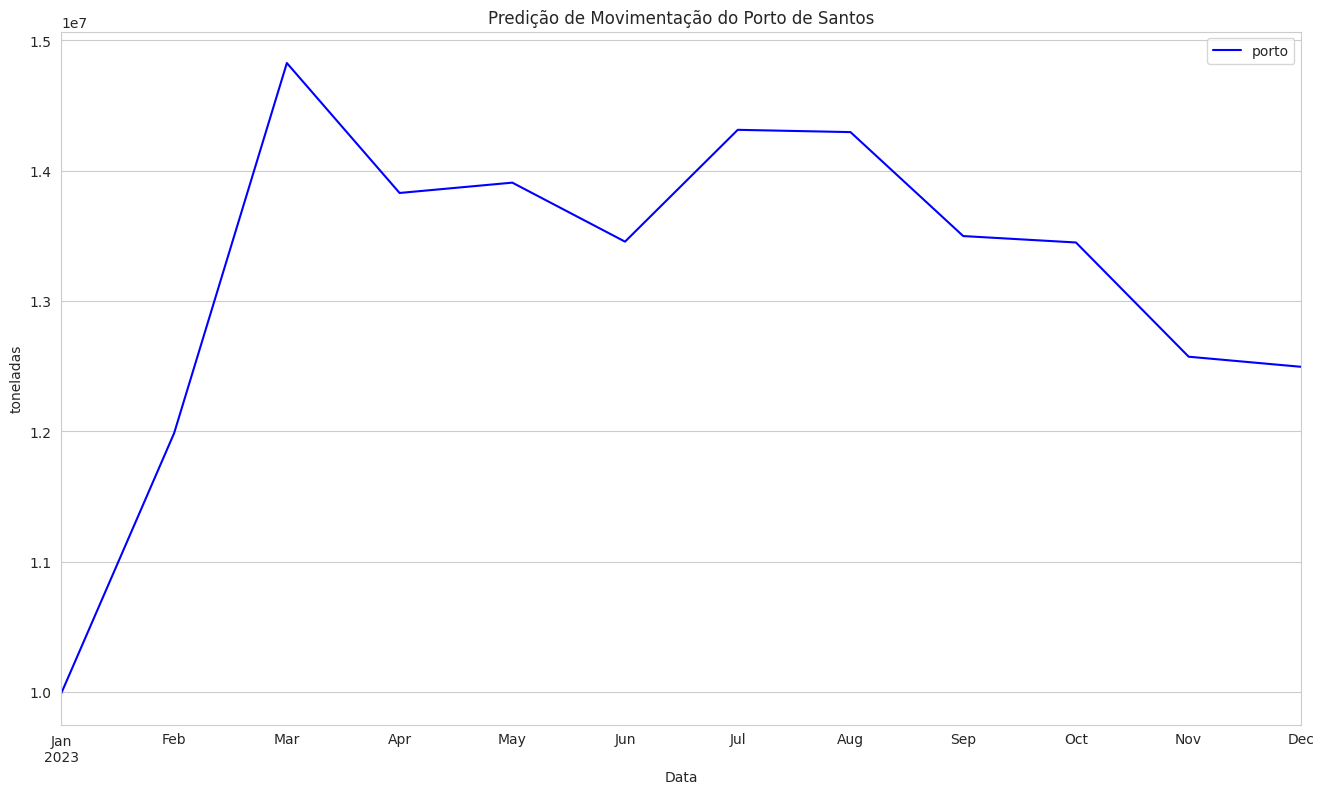

In [21]:
# Definir o estilo do seaborn
sns.set_style('whitegrid')

# Criar o gráfico
fig, ax = plt.subplots(figsize=(16, 9))

# Plotar a série temporal com grid
df_final.plot(x='data', y='porto', ax=ax, color='blue')

# Configurar os rótulos e título
ax.set_xlabel('Data')
ax.set_ylabel('toneladas')
ax.set_title('Predição de Movimentação do Porto de Santos')

# Adicionar grid
ax.grid(True)
# Personalizar a escala do eixo y
#ax.set_ylim(0, 17000000)  # Definir limites mínimo e máximo
# Mostrar o gráfico
plt.show()

### Série temporal Completa

In [22]:
# Conversão de ano/mes em index
movimento_df['data'] = pd.to_datetime(movimento_df['ano'].astype(str) + '-' + movimento_df['mes'].astype(str), format='%Y-%m')
movimento_df = movimento_df.drop(['ano', 'mes'], axis=1)
data = movimento_df.pop('data')  # Remove a coluna e armazena em uma variável
movimento_df.insert(0, 'data', data)  # Insere a coluna na posição desejada
del data
movimento_df['data'] = pd.to_datetime(movimento_df['data'])

movimento_df.drop(['graos', 'outras', 'sugar'], axis=1, inplace=True)

In [23]:
posterior_df = pd.read_csv('./staging/posterior_ts.csv')
posterior_df['data'] = pd.to_datetime(posterior_df['data'])

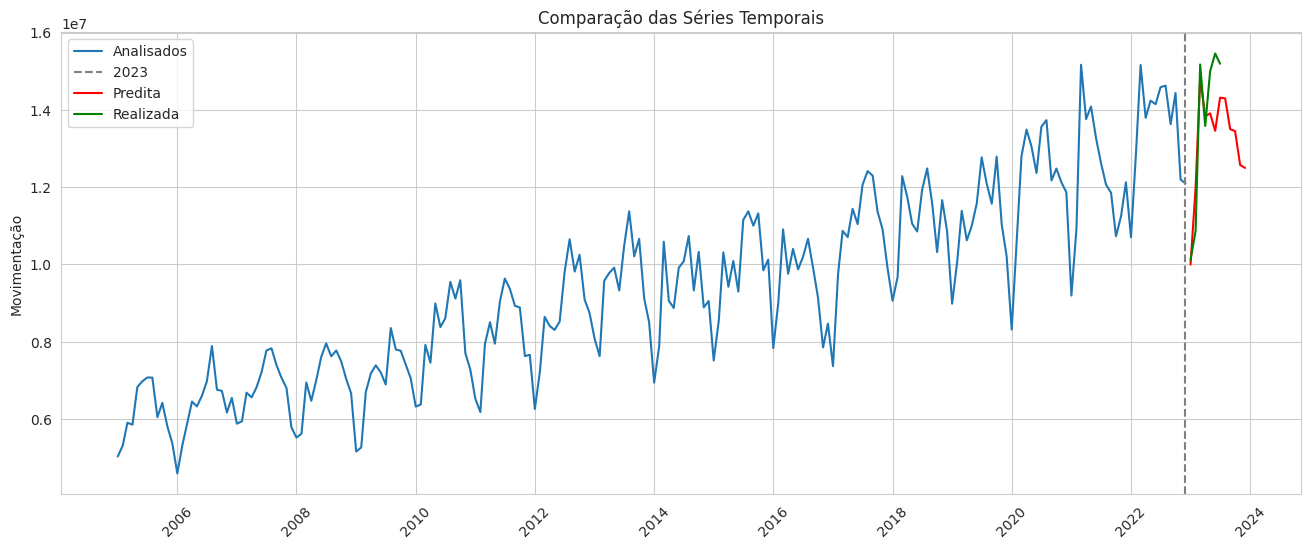

In [37]:
# Definir o estilo do seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(16, 6))
# Plotar as séries temporais
plt.plot(movimento_df.data, movimento_df.porto, label='Analisados')
plt.axvline(x=movimento_df.data[len(movimento_df.data)-1], color='gray', linestyle='--', label='2023')
plt.plot(df_final.data, df_final.porto, label='Predita', color='r')
plt.plot(posterior_df.data, posterior_df.porto, label='Realizada', color='g')

# Configurando formatação do eixo x para datas mensais
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1]))

# Rotacionando os rótulos do eixo x
plt.xticks(rotation=45)

# Configurar os rótulos e título
plt.xlabel('')
plt.ylabel('Movimentação')
plt.title('Comparação das Séries Temporais')

# Adicionar legenda
plt.legend()

# Mostrar o gráfico
plt.show()

# Comparando os dados de 2023 Previstos x Realizados

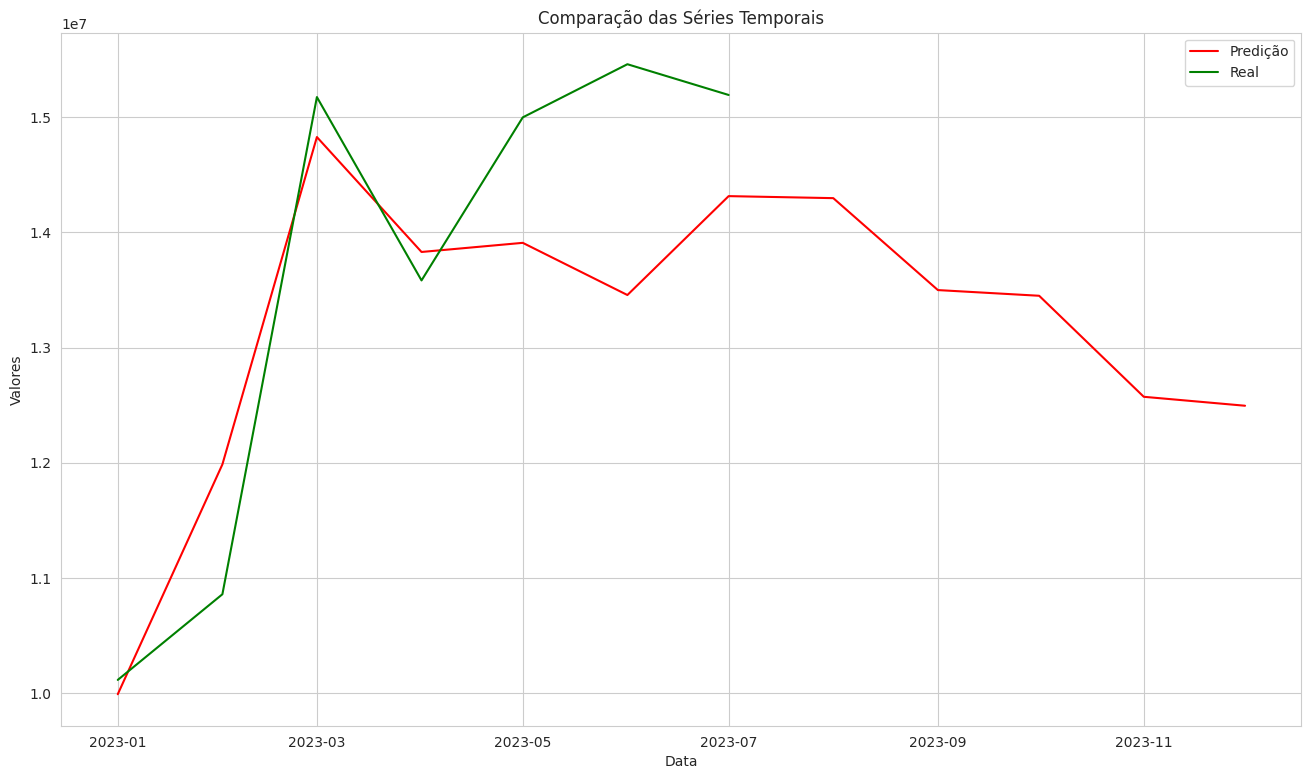

In [27]:
# Definir o estilo do seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(16, 9))
# Plotar as séries temporais
plt.plot(df_final.data, df_final.porto, label='Predição', color='red')
plt.plot(posterior_df.data, posterior_df.porto, label='Real', color='g')

# Configurar os rótulos e título
plt.xlabel('Data')
plt.ylabel('Valores')
plt.title('Comparação das Séries Temporais')

# Adicionar legenda
plt.legend()

# Mostrar o gráfico
plt.show()

## Salvando a predição pela regressão linear

In [28]:
df_final.to_csv('./staging/linear_reg.csv', index=False)